### SKILLCRAFT TECHNOLOGY DATA SCIENCE INTERNSHIP TASK 3

### Step 1: Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Step 2: Load the dataset

In [5]:
file_path = r"C:\Users\Lenovo\Downloads\bank.csv" 
df = pd.read_csv(file_path, delimiter=";") 

### Step 3: Data Exploration

In [6]:
print("Dataset Overview:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 45

### Step 4: Data Preprocessing

In [7]:
# Convert categorical features to numerical values using Label Encoding
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define features and target variable
X = df.drop(columns=["y"])  # 'y' is the target variable (whether the customer purchased)
y = df["y"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Train Decision Tree Classifier

In [8]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

### Step 6: Model Evaluation

In [9]:
y_pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.901657458563536

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.57      0.38      0.45        98

    accuracy                           0.90       905
   macro avg       0.75      0.67      0.70       905
weighted avg       0.89      0.90      0.89       905


Confusion Matrix:
 [[779  28]
 [ 61  37]]


### Step 7: Visualizing the Decision Tree

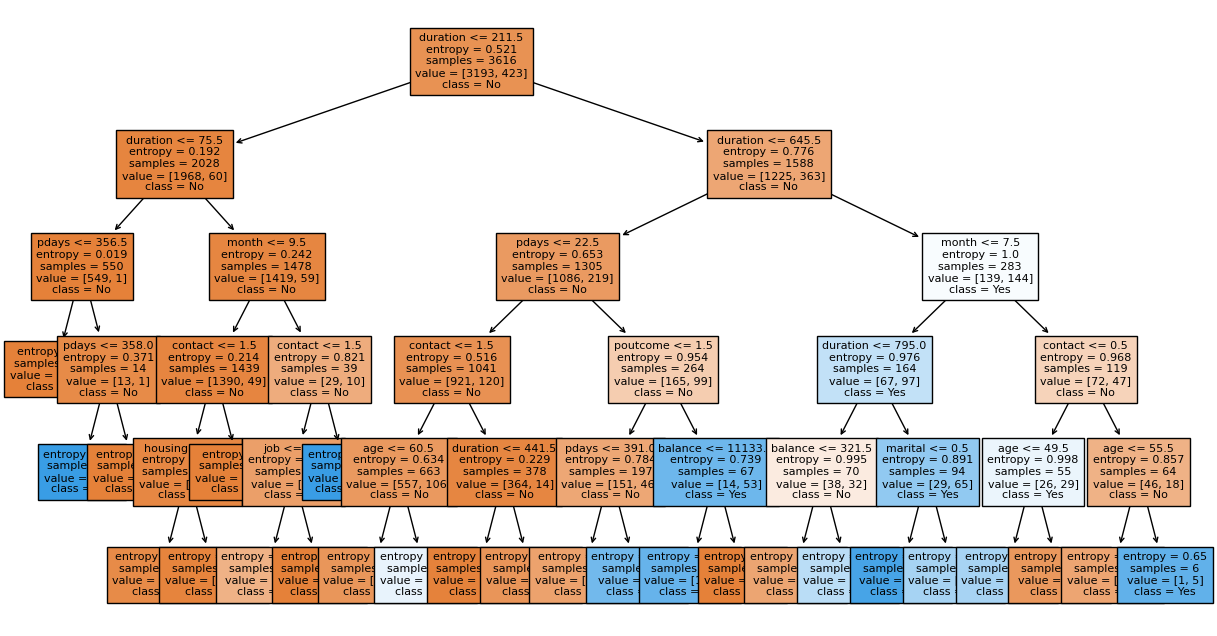

In [10]:
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=list(X.columns), class_names=["No", "Yes"], filled=True, fontsize=8)
plt.show()